# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load Data

In [2]:
data15min_mean_path = r'C:\Users\Dell\Documents\GitHub\opf\data\raw\consumption_15min_mean.csv'
data_individual_house_path = r'C:\Users\Dell\Documents\GitHub\opf\data\raw\household_power_consumption.csv'

df_15min = pd.read_csv(data15min_mean_path)
df_individual = pd.read_csv(data_individual_house_path)

# Dataset 15 minute interval

In [3]:
df_15min.head()

,datetime,datetime.1,value
0,0,0,0.096
1,0,15,0.091
2,0,30,0.087
3,0,45,0.083
4,1,0,0.079


In [4]:
df_15min['time'] = df_15min[['datetime', 'datetime.1']].astype(str).agg(':'.join, axis=1)
df_15min['time'] = pd.to_datetime(df_15min['time'], format='%H:%M').dt.time
df_15min.drop(['datetime','datetime.1'],axis=1, inplace=True)
df_15min.head()

,value,time
0,0.096,00:00:00
1,0.091,00:15:00
2,0.087,00:30:00
3,0.083,00:45:00
4,0.079,01:00:00


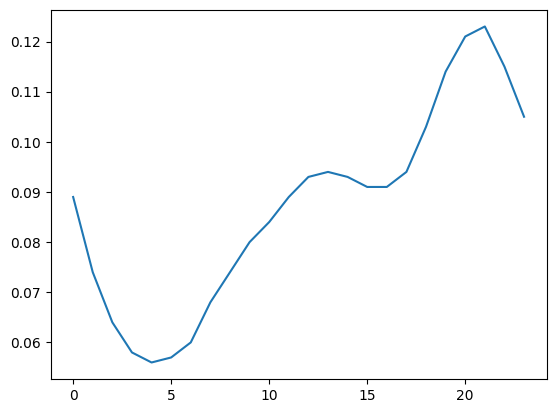

In [5]:
hourly_means = {}

for index, row in df_15min.iterrows():
    hour = row['time'].hour
    value = row['value']
    
    if hour in hourly_means:
        hourly_means[hour].append(value)
    else:
        hourly_means[hour] = [value]

# Calculate mean for each hour
for hour, values in hourly_means.items():
    mean_value = sum(values) / len(values)
    hourly_means[hour] = round(mean_value,3)

# Printing the hourly mean values
# for hour, mean_value in hourly_means.items():
#     print(f"Hour {hour}: Mean value = {mean_value}")
df_hourly = pd.DataFrame(hourly_means,index=[0])
df_hourly = df_hourly.transpose()

plt.plot(df_hourly)

In [6]:
active_power = df_hourly.to_numpy()

In [7]:
active_power = df_hourly.to_numpy()
days = 300
hours = 24

Num_households = 100

def extend_data(active_power,days,Num_households):
    reshaped_array = np.tile(active_power, (days, 1)).repeat(Num_households, axis=1)
    return reshaped_array 

# Individual houselhold

In [8]:
df_individual.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


In [9]:
# Assuming you have the dataframe named "df"
df_individual['Datetime'] = pd.to_datetime(df_individual['Date'] + ' ' + df_individual['Time'])
df_individual.drop(['Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3'], axis=1, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15036\2252274340.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_individual['Datetime'] = pd.to_datetime(df_individual['Date'] + ' ' + df_individual['Time'])


In [10]:
df_individual.head()

,Date,Time,Global_active_power,Global_reactive_power,Datetime
0,1/1/07,0:00:00,2.58,0.136,2007-01-01 00:00:00
1,1/1/07,0:01:00,2.552,0.1,2007-01-01 00:01:00
2,1/1/07,0:02:00,2.55,0.1,2007-01-01 00:02:00
3,1/1/07,0:03:00,2.55,0.1,2007-01-01 00:03:00
4,1/1/07,0:04:00,2.554,0.1,2007-01-01 00:04:00


In [11]:
df_individual.reset_index(inplace=True)
df_individual.head()

,index,Date,Time,Global_active_power,Global_reactive_power,Datetime
0,0,1/1/07,0:00:00,2.58,0.136,2007-01-01 00:00:00
1,1,1/1/07,0:01:00,2.552,0.1,2007-01-01 00:01:00
2,2,1/1/07,0:02:00,2.55,0.1,2007-01-01 00:02:00
3,3,1/1/07,0:03:00,2.55,0.1,2007-01-01 00:03:00
4,4,1/1/07,0:04:00,2.554,0.1,2007-01-01 00:04:00


In [12]:
# Replace non-numeric values with NaN
df_individual['Global_active_power'] = pd.to_numeric(df_individual['Global_active_power'], errors='coerce')
df_individual['Global_reactive_power'] = pd.to_numeric(df_individual['Global_reactive_power'], errors='coerce')

# Calculate the mean values
mean_active_power = df_individual['Global_active_power'].mean()
mean_reactive_power = df_individual['Global_reactive_power'].mean()

# Replace NaN values with the mean
df_individual['Global_active_power'].fillna(mean_active_power, inplace=True)
df_individual['Global_reactive_power'].fillna(mean_reactive_power, inplace=True)


In [13]:
df_individual['Global_active_power'] = df_individual['Global_active_power'].astype(float)
df_individual['Global_reactive_power'] = df_individual['Global_reactive_power'].astype(float)


In [14]:
df_hourly_ind = df_individual.groupby([df_individual['Date'],df_individual['Datetime'].dt.hour])[['Global_active_power','Global_reactive_power']].mean()

In [15]:
df_hourly_ind.reset_index(inplace=True)

In [16]:
df_hourly_ind.head()

,Date,Datetime,Global_active_power,Global_reactive_power
0,1/1/07,0,2.550633,0.112800
1,1/1/07,1,2.523400,0.071633
2,1/1/07,2,2.582333,0.106667
3,1/1/07,3,2.541667,0.090100
4,1/1/07,4,2.475733,0.088167


In [17]:
# Assuming you have the dataframe named "df" with "Date" and "Datetime" columns
df_hourly_ind['Datetime'] = pd.to_datetime(df_hourly_ind['Date'] + ' ' + df_hourly_ind['Datetime'].astype(str) + ':00:00')

# Drop the "Date" column
df_hourly_ind.drop('Date', axis=1, inplace=True)
df_hourly_ind.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_15036\2003686651.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_hourly_ind['Datetime'] = pd.to_datetime(df_hourly_ind['Date'] + ' ' + df_hourly_ind['Datetime'].astype(str) + ':00:00')


,Datetime,Global_active_power,Global_reactive_power
0,2007-01-01 00:00:00,2.550633,0.112800
1,2007-01-01 01:00:00,2.523400,0.071633
2,2007-01-01 02:00:00,2.582333,0.106667
3,2007-01-01 03:00:00,2.541667,0.090100
4,2007-01-01 04:00:00,2.475733,0.088167


In [18]:
mean_active = df_hourly_ind.groupby(df_hourly_ind["Datetime"].dt.hour)["Global_active_power"].mean().to_numpy()
mean_reactive = df_hourly_ind.groupby(df_hourly_ind["Datetime"].dt.hour)["Global_reactive_power"].mean().to_numpy()

In [19]:
def extend_data(active_power,days,Num_households):
    reshaped_array = np.tile(active_power, (days, 1)).repeat(Num_households, axis=1)
    return reshaped_array

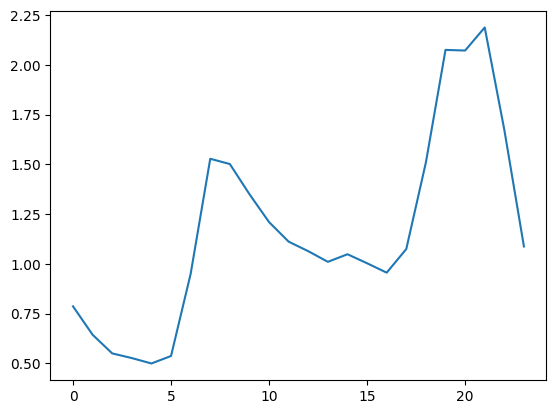

In [22]:
plt.plot(mean_reactive)

In [25]:
mean_active

array([0.78639935, 0.64363873, 0.54994628, 0.52648127, 0.49930411,
       0.53701442, 0.94975678, 1.52829416, 1.50186635, 1.35022242,
       1.20998035, 1.11156754, 1.06371099, 1.0103146 , 1.04837154,
       1.00310225, 0.95583282, 1.0747803 , 1.51013216, 2.07559754,
       2.07246191, 2.18833161, 1.67371844, 1.08765308])

In [26]:
np.save(r"C:\Users\Dell\Documents\GitHub\opf\data\interim\cons_act_mean.npy",mean_active)
np.save(r"C:\Users\Dell\Documents\GitHub\opf\data\interim\cons_react_mean.npy",mean_reactive)
